In [ ]:
#Install necessary libraries
!pip install pandas
!pip install yfinance
!pip install matplotlib


[notice] A new release of pip is available: 25.0.1 -> 25.1
[notice] To update, run: python3 -m pip install --upgrade pip

[notice] A new release of pip is available: 25.0.1 -> 25.1
[notice] To update, run: python3 -m pip install --upgrade pip

[notice] A new release of pip is available: 25.0.1 -> 25.1
[notice] To update, run: python3 -m pip install --upgrade pip


YF.download() has changed argument auto_adjust default to True


/tmp/ipykernel_38778/2361493806.py:20: FutureWarning: The argument 'date_parser' is deprecated and will be removed in a future version. Please use 'date_format' instead, or read your data in as 'object' dtype and then call 'to_datetime'.
  Price_Targets = pd.read_csv(


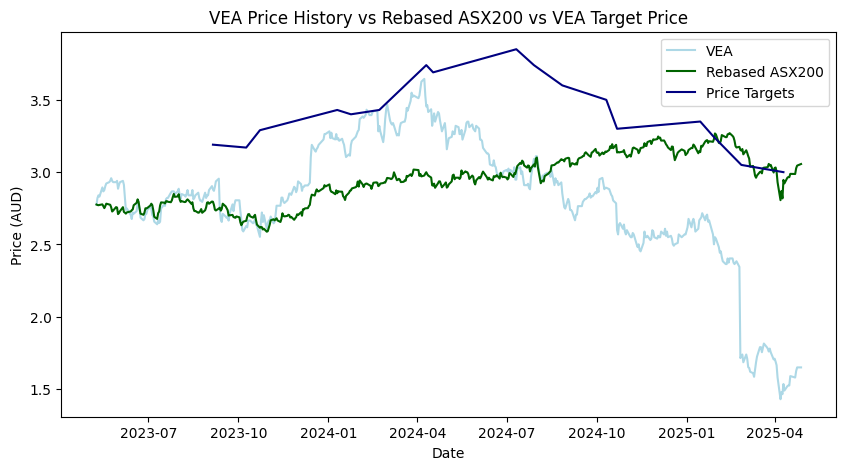

In [1]:
#Import necessary Libraries
import pandas as pd
import yfinance as yf
import matplotlib.pyplot as plt
import datetime as dt

#Define necessary constants 
Tickers = ['VEA.AX', '^AXJO']
Start_Date = '2023-05-09'
End_Date = pd.Timestamp.today().strftime('%Y-%m-%d')

#Download and align closing prices from Yahoo Finance
Closing_Prices = yf.download(Tickers, start=Start_Date, end=End_Date, progress=False)['Close'].loc[Start_Date:]

#Rebase the ASX200 Index to the first closing price of VEA
Initial_Ratio = Closing_Prices['VEA.AX'].iloc[0] / Closing_Prices['^AXJO'].iloc[0]
Closing_Prices['Rebased_ASX200'] = Closing_Prices['^AXJO'] * Initial_Ratio

#Read historical price targets from CSV file and parse 'Date' column into datetime format
Price_Targets = pd.read_csv(
    "VEApricetargets.csv",
     parse_dates =  ['Date'],
     date_parser = lambda x: pd.to_datetime(x, format='%m/%d/%y')
)

#Sort price targets by date and filter to match date range of closing prices
Price_Targets = Price_Targets.sort_values('Date')
Price_Targets = Price_Targets[
    (Price_Targets['Date'] >= Closing_Prices.index[0]) &
    (Price_Targets['Date'] <= Closing_Prices.index[-1])
]

#Plot historical closing prices and price targets 
plt.figure(figsize=(10,5))
plt.plot(Closing_Prices.index, Closing_Prices['VEA.AX'], label='VEA', color='lightblue')
plt.plot(Closing_Prices.index, Closing_Prices['Rebased_ASX200'], label='Rebased ASX200', color='darkgreen')
plt.plot(Price_Targets['Date'], Price_Targets['Target Price'], label='Price Targets', color='navy')
plt.title('VEA Price History vs Rebased ASX200 vs VEA Target Price')
plt.xlabel('Date')
plt.ylabel('Price (AUD)')
plt.legend()
plt.savefig("vea_price_chart.png", bbox_inches='tight', dpi=300)
plt.show()
